In [1]:
import os
import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
subprocess.call(['mkdir',work_dir])
os.chdir(work_dir)

### Download data

In [2]:
%%bash
#wget http://tools.iedb.org/static/main/benchmark_mhci_reliability.tar.gz
#tar -xvf benchmark_mhci_reliability.tar.gz

In [3]:
%%bash
ls -hal benchmark_mhci_reliability

total 40K
drwxr-xr-x 5 ribli users 4.0K Mar 11  2015 .
drwxr-xr-x 3 ribli users 4.0K Apr 27 12:48 ..
drwxr-x--- 5 ribli users 4.0K Mar 11  2015 binding
-rwxr-x--- 1 ribli users 1.3K Mar 11  2015 description_files_at_iedbtools.txt
drwxr-x--- 3 ribli users 4.0K Mar 11  2015 features
-rwxr-x--- 1 ribli users  16K Mar 11  2015 FILE_S1.tar.gz
drwxr-x--- 6 ribli users 4.0K Mar 11  2015 predictions


In [4]:
%%bash
ls -hal benchmark_mhci_reliability/binding/

total 24K
drwxr-x--- 5 ribli users 4.0K Mar 11  2015 .
drwxr-xr-x 5 ribli users 4.0K Mar 11  2015 ..
drwxr-x--- 2 ribli users 4.0K Mar 11  2015 bd2009.1
drwxr-x--- 2 ribli users 4.0K Mar 11  2015 bd2013.1
drwxr-x--- 2 ribli users 4.0K Mar 11  2015 blind.1
-rw-r--r-- 1 ribli users  442 Feb 13  2014 README.txt


----
## The 'train' data for the benchmark is 2009, and the 'blind' data is the newer ones

In [5]:
%%bash
ls -hal benchmark_mhci_reliability/binding/bd2009.1/

total 23M
drwxr-x--- 2 ribli users 4.0K Mar 11  2015 .
drwxr-x--- 5 ribli users 4.0K Mar 11  2015 ..
-rw-r--r-- 1 ribli users 5.6M May 29  2013 bdata.2009.mhci.public.1.cv_gs.txt
-rw-r--r-- 1 ribli users 5.7M May 29  2013 bdata.2009.mhci.public.1.cv_rnd.txt
-rw-r--r-- 1 ribli users 5.5M May 29  2013 bdata.2009.mhci.public.1.cv_sr.txt
-rw-r--r-- 1 ribli users 6.0M May 29  2013 bdata.2009.mhci.public.1.txt
-rwxr-xr-x 1 ribli users 5.0K May 29  2013 quick-check-cv-data.py
-rw-r--r-- 1 ribli users 1.2K May 29  2013 README.txt


### Load it

In [6]:
dataf='benchmark_mhci_reliability/binding/bd2009.1/bdata.2009.mhci.public.1.txt'
t_data=pd.read_csv(dataf,sep='\t')
t_data['type']='train'
t_data.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas,type
0,None,ELA-A1,12,TBD,GSQKLTTGNCNW,=,605,train
1,None,ELA-A1,12,TBD,HVKDETNTTEYW,=,880,train
2,None,ELA-A1,12,TBD,LVEDVTNTAEYW,=,170,train
3,None,ELA-A1,12,TBD,RVEDKTNTAEYW,=,70,train
4,None,ELA-A1,12,TBD,RVEDVKNTAEYW,=,65,train


In [7]:
dataf='benchmark_mhci_reliability/binding/blind.1/bdata.2013.mhci.public.blind.1.txt'
b_data=pd.read_csv(dataf,sep='\t')
b_data['type']='test'
b_data.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas,type
0,mouse,H-2-Db,8,TBD,AAFEFVYV,=,30819.222636,test
1,mouse,H-2-Db,8,TBD,AFFAFRYV,>,88000.000000,test
2,mouse,H-2-Db,8,TBD,AGLLFVLL,>,88000.000000,test
3,mouse,H-2-Db,8,TBD,AGLQVINL,=,59459.459459,test
4,mouse,H-2-Db,8,TBD,AHICYANL,=,67893.473983,test


In [8]:
data=pd.concat([t_data,b_data]).reset_index(drop=True)

### Species ?

In [20]:
data.groupby(['type','species'],as_index=False).count()[['type','species','meas']]

,type,species,meas
0,test,human,25667
1,test,macaque,662
2,test,mouse,1351
3,train,None,14
4,train,chimpanzee,3374
5,train,gorilla,15
6,train,human,116625
7,train,macaque,9564
8,train,mouse,8062


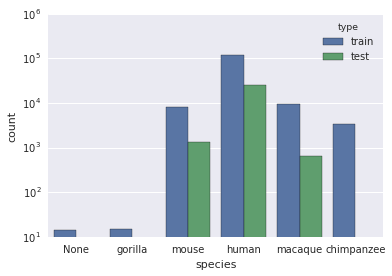

In [13]:
sns.countplot(x='species',hue='type',data=data)
plt.yscale('log')

## No duplicates !!!

In [21]:
np.sum(data[['species','mhc','sequence']].duplicated())

0

### But peptides are measured with many different HLA types

In [22]:
np.sum(data.sequence.duplicated())

125425

### 30k unique peptids

In [23]:
len(data.groupby(['sequence']).count())

39909

### HLA types

In [29]:
data.groupby(['mhc','type'],as_index=False).count()[['mhc','type','meas']]

,mhc,type,meas
0,ELA-A1,train,14
1,Gogo-B-0101,train,15
2,H-2-Db,test,564
3,H-2-Db,train,3216
4,H-2-Dd,train,315
5,H-2-Kb,test,558
6,H-2-Kb,train,3407
7,H-2-Kd,test,229
8,H-2-Kd,train,452
9,H-2-Kk,train,371


### HLA types were differently coded here ...

In [53]:
from  re import sub
data['my_mhc']=[sub(':','',sub('\*','-',hla_type))  for hla_type in data['mhc'].values]

### No new hla types in test

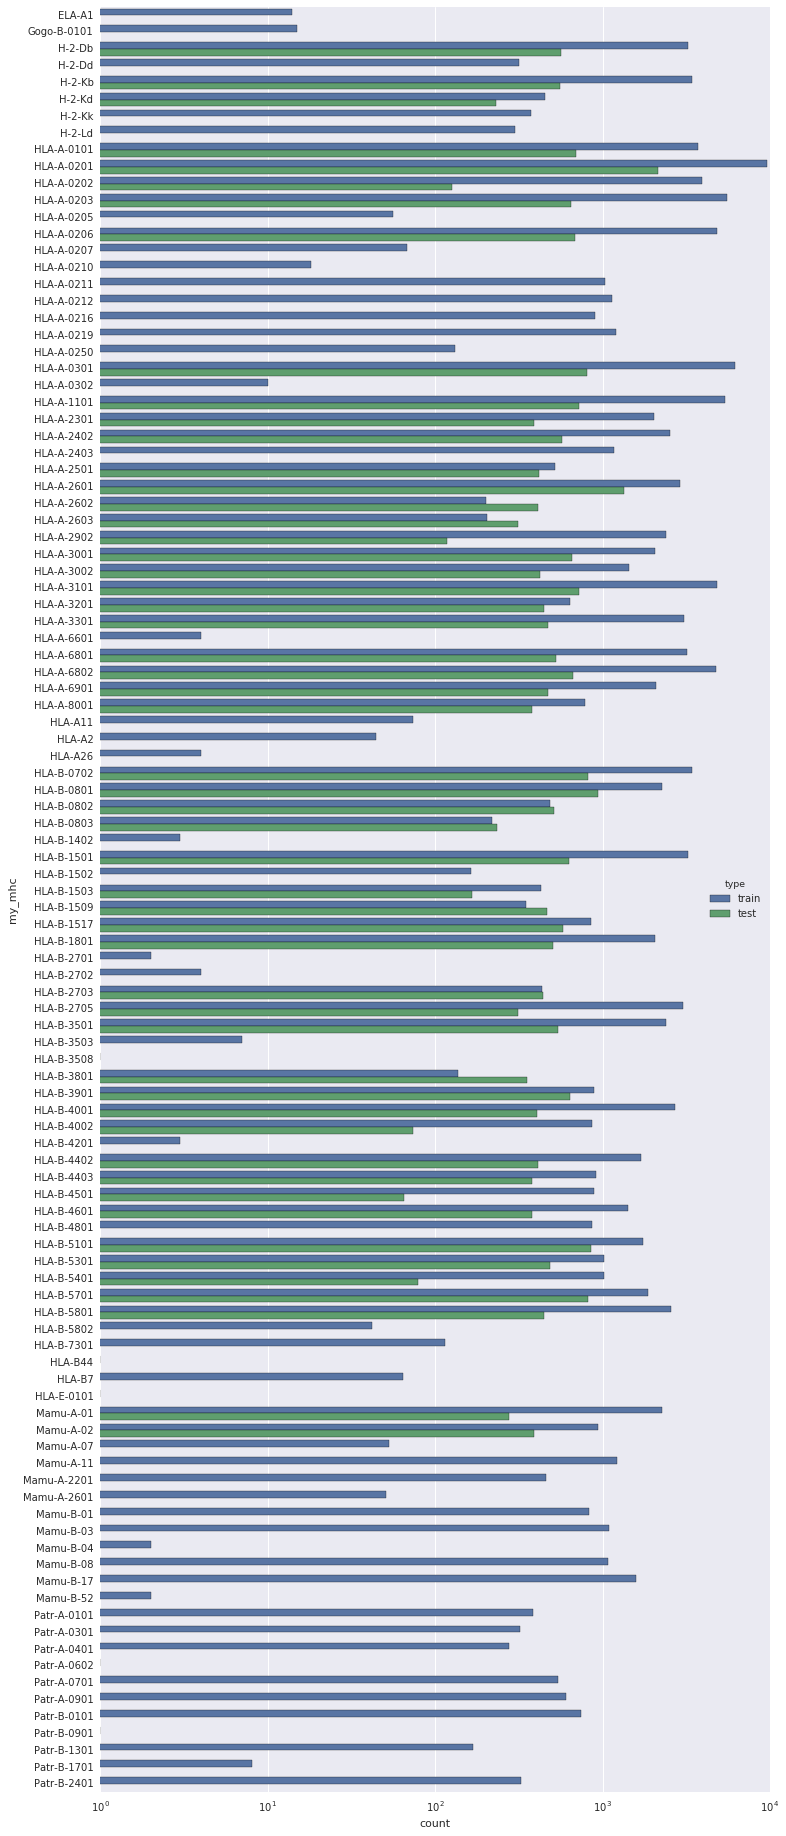

In [54]:
plt.figure(figsize=(12,32))
sns.countplot(y='my_mhc',hue='type',data=data)
plt.xscale('log')

### Peptide lengths

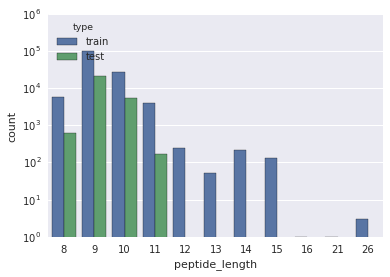

In [56]:
sns.countplot(x='peptide_length',hue='type',data=data)
plt.yscale('log')

### The measurement value

In [63]:
data['log_meas']=np.log10(data.meas)

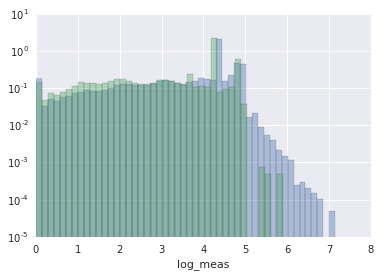

In [67]:
sns.distplot(data[data['type']=='train']['log_meas'],kde=False,norm_hist=True)
sns.distplot(data[data['type']=='test']['log_meas'],kde=False,norm_hist=True)
plt.yscale('log')

### cv, cross valdation: to be done :)

In [68]:
data.groupby('cv',as_index=False).count()[['cv','meas']]

,cv,meas
0,TBD,165334


### Not just equality measurements

In [69]:
data.groupby('inequality',as_index=False).count()[['inequality','meas']]

,inequality,meas
0,<,2007
1,=,95524
2,>,67803
